## Opinet - 셀프주요소가 정말 저렴할까?

In [16]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

#### 1. 셀레니움으로 서울시 구별 주유소 가격정보 얻기

In [17]:
# Opinet 초기화면 > 싼 주유소 찾기 > 지역별
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)           # .py에서는 쉬어줘야 함.

In [18]:
# 광역시도에서 서울 입력
metro = driver.find_element(By.ID, 'SIDO_NM0')
metro.send_keys('서울')

In [19]:
# 서울시 자치구 리스트 가져오기
sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="4c93e2e95ed0d47e24a07f93a0cf5ba8", element="02C30C185174CD6A6B4A6F697205B2C1_element_99")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4c93e2e95ed0d47e24a07f93a0cf5ba8", element="02C30C185174CD6A6B4A6F697205B2C1_element_101")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4c93e2e95ed0d47e24a07f93a0cf5ba8", element="02C30C185174CD6A6B4A6F697205B2C1_element_103")>]

In [20]:
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [21]:
gu_names = [gu.text for gu in gu_list[1:]]
gu_names[:3]

['강남구', '강동구', '강북구']

In [22]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [23]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()
time.sleep(2)

In [24]:
# 강남구를 제외한 나머지 
for gu in gu_names[1:]:
    sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    sigungu.send_keys(gu)
    time.sleep(3)
    driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)

In [25]:
driver.close()

### 2. 구별 휘발유 가격에 대한 정리

In [26]:
from glob import glob
glob('c:/Users/human/Downloads/지역*.xls')

['c:/Users/human/Downloads\\지역_위치별(주유소) (1).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (10).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (11).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (12).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (13).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (14).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (15).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (16).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (17).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (18).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (19).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (2).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (20).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (21).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (22).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (23).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (24).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (3).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (4).xls',
 'c:/Users/human/Downloads\\지역_위치별(

In [27]:
# conda activate base; pip instal xlrd 해야 read_excel 사용 가능
filename = 'c:/Users/human/Downloads/지역_위치별(주유소).xls'
df = pd.read_excel(filename, header=2)      # header 2줄 넘겨서 읽어라
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1769,1668,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1978,1788,1688,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,2025,1795,1735,-


In [28]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []
for filename in glob('c:/Users/human/Downloads/지역*.xls'):
    df = pd.read_excel(filename, header=2)
    df_list.append(df)

In [29]:
df = pd.concat(df_list)
df.shape

(439, 10)

In [30]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.rename(columns={'휘발유':'가격', '셀프여부' : '셀프'}, inplace=True)
df.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스


In [31]:
df.tail()

,상호,주소,가격,셀프,상표
29,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지
30,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [36]:
df.set_index('상호', inplace=True)
df.reset_index(inplace=True)
df.tail()

,상호,주소,가격,셀프,상표,구
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [33]:
df['구'] = df.주소.apply(lambda x:x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크,강동구
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스,강동구


In [34]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [37]:
# 가격의 타입 확인
type(df.가격[0])

numpy.int64

In [38]:
df.to_csv('data/opinet_20230919.csv', index=False)
pd.read_csv('data/opinet_20230919.csv').tail()

,상호,주소,가격,셀프,상표,구
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


### 3. 셀프주요소가 정말 저렴할까?

In [49]:
df.pivot_table('가격', '셀프', aggfunc=['count', 'mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
셀프,,,,,,
N,172,1948.372093,1694,2776,217.620387,47358.632667
Y,267,1800.925094,1724,2278,54.626775,2984.084594


- 셀프 여부에 따른 가격의 Boxplot

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

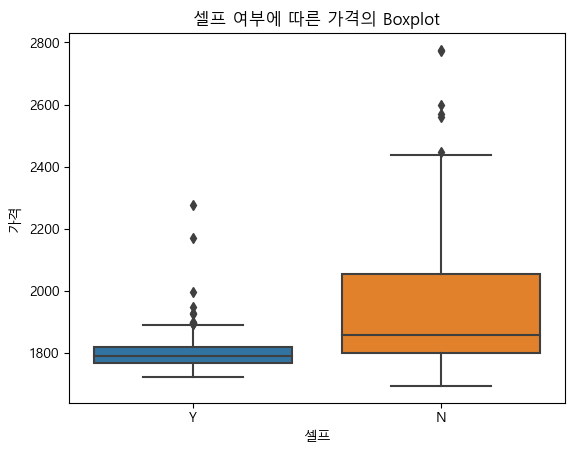

In [48]:
sns.boxplot(df, x='셀프', y='가격')
plt.title('셀프 여부에 따른 가격의 Boxplot');

- 가설검정(2-sample T test)

In [50]:
# equal_var=False 분산차이가 나는 것을 보정
import scipy as sp
sp.stats.ttest_ind(df[df.셀프=='Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-8.710850568947652, pvalue=1.6733753870177818e-15)

In [51]:
# p-value가 0.05보다 (훨씬) 작으므로 귀무가설 기각, 대립가설 채택
#       - 귀무가설(H0) : 셀프주유소와 일반주유소의 가격 차이가 없다.
#       - 대립가설(H1) : 셀프주유소와 일반주유소의 가격 차이가 있다.

- 상표별로 가격 비교하기

In [52]:
df.groupby('상표')[['가격']].agg(['count', 'mean', 'max', 'min', 'std', 'var'])

가격                                                   
         count         mean   max   min         std           var
상표                                                               
GS칼텍스      103  1888.116505  2773  1745  205.944705  42413.221588
HD현대오일뱅크   116  1825.982759  2560  1694  121.208192  14691.425787
S-OIL       78  1827.141026  2278  1738   87.937068   7732.927905
SK에너지      129  1892.116279  2776  1737  176.810042  31261.791061
알뜰(ex)       1  1724.000000  1724  1724         NaN           NaN
알뜰주유소       10  1769.700000  1878  1735   42.572944   1812.455556
자가상표         2  1828.000000  1868  1788   56.568542   3200.000000

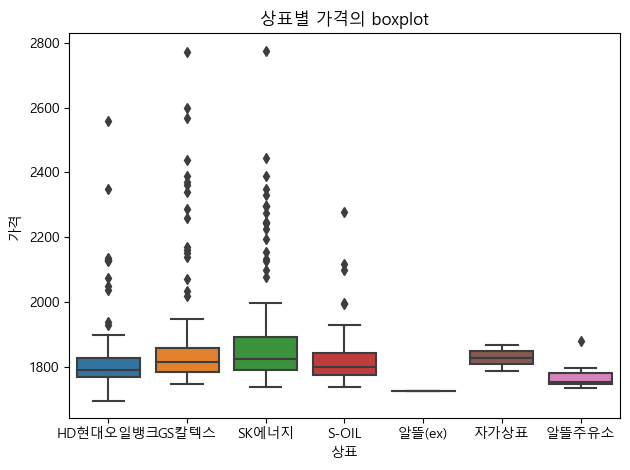

In [113]:
sns.boxplot(data=df, y='가격', x='상표')
plt.title('상표별 가격의 boxplot')
plt.tight_layout();

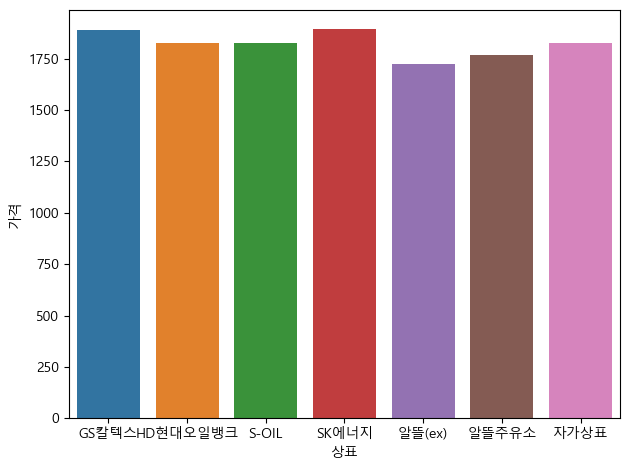

In [64]:
# 상표별 평균 가격의 막대그래프
df_brand = df.groupby('상표')[['가격']].mean()
sns.barplot(data=df_brand, y='가격', x=df_brand.index)
plt.tight_layout();

In [66]:
# 구별 가격 비교
df_gu = df.groupby('구')[['가격']].agg(['count', 'mean', 'max', 'min', 'std', 'var' ])
df_gu.head(3)

가격                                                   
    count         mean   max   min         std           var
구                                                           
강남구    34  2022.941176  2598  1769  237.095294  56214.178253
강동구    14  1882.500000  2118  1779   90.352940   8163.653846
강북구    12  1784.666667  1847  1764   21.943454    481.515152

In [92]:
df_gu_sort = df_gu['가격']['mean'].to_frame().sort_values(by='mean', ascending=False)
df_gu_max = df_gu_sort['mean'].max()
df_gu_min = df_gu_sort['mean'].min()
df_gu[df_gu_sort['mean'] == df_gu_max].index, df_gu[df_gu_sort['mean'] == df_gu_min].index

C:\Users\human\AppData\Local\Temp\ipykernel_6372\274416572.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gu[df_gu_sort['mean'] == df_gu_max].index, df_gu[df_gu_sort['mean'] == df_gu_min].index


(Index(['용산구'], dtype='object', name='구'),
 Index(['은평구'], dtype='object', name='구'))

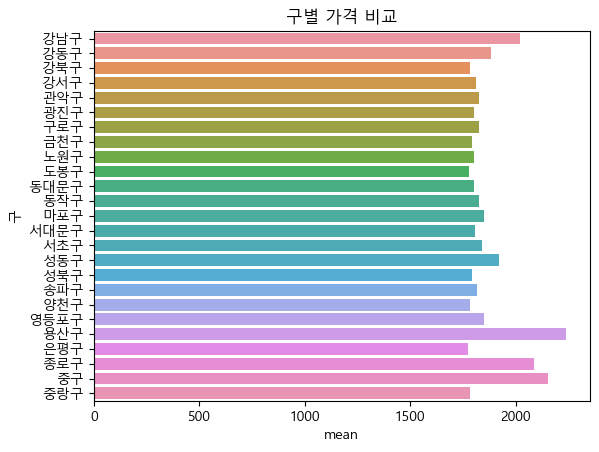

In [72]:
sns.barplot(data=df_gu, x=df_gu['가격']['mean'], y=df_gu.index)
plt.title('구별 가격 비교');

In [110]:
df1 = df[(df.구 == '용산구') | (df.구 == '은평구')][['가격', '구']] 
df1

,가격,구
226,1938,용산구
227,2125,용산구
228,2125,용산구
229,2129,용산구
230,2129,용산구
231,2150,용산구
232,2225,용산구
233,2245,용산구
234,2297,용산구
235,2297,용산구


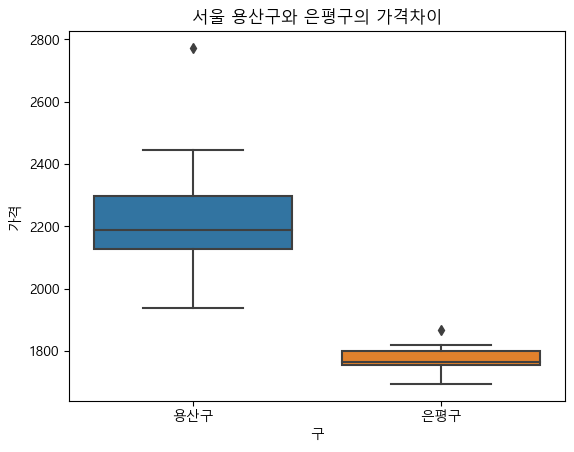

In [111]:
sns.boxplot(data=df1, x='구', y='가격')
plt.title('서울 용산구와 은평구의 가격차이');

In [112]:
# p-value 0.05보다 작으므로 대립가설(H1) 채택, 귀무가설(H0) 기각
import scipy as sp
sp.stats.ttest_ind(df1[df1.구 == '용산구']['가격'], df1[df1.구 == '은평구']['가격'], equal_var=False)

Ttest_indResult(statistic=7.567508441975645, pvalue=7.878063065778418e-06)